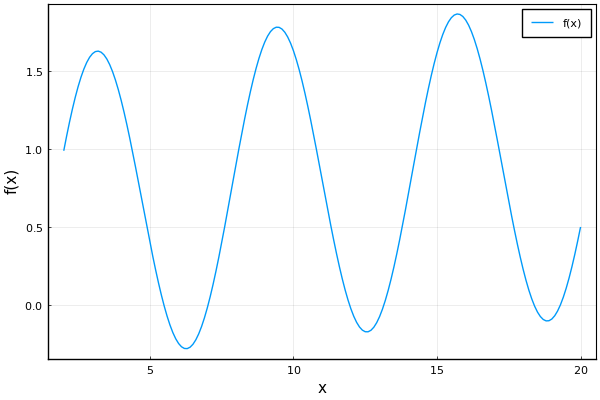

In [21]:
# Shubert-Piyavskii Method

using Plots
pyplot()

f(x) = abs(0.5x^0.2) - cos(x)
x = 2:0.1:20

plot(x, f.(x), framestyle = :box, xlabel = "x", ylabel = "f(x)", label = "f(x)")

In [22]:
diff_forward(f, x; h=sqrt(eps(Float64))) = (f(x+h) - f(x))/h

diff_forward (generic function with 1 method)

In [23]:
# Lipschitz constant
L = maximum(diff_forward.(f, x))

1.0180794224143028

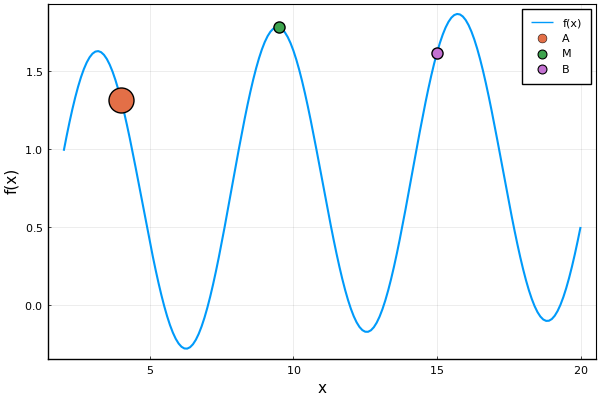

In [24]:
# First iteration

# Initial points
a, b = 4, 15
m = (a+b)/2

plot(x, f.(x), framestyle = :box, xlabel = "x", ylabel = "f(x)", lw = 1.5, label = "f(x)")
scatter!([a], [f(a)], label = "A", ms = 18)
scatter!([m], [f(m)], label = "M", ms = 8)
scatter!([b], [f(b)], label = "B", ms = 8)

In [29]:
# Function evaluation at a, b & m
fa = f(a)
fb = f(b)
fm = f(m)

A = [a, fa]
B = [b, fb]
M = [m, fm]

L = 5

# Compute for intersection A-M & M-B
function intersec(P1, P2, L)
    t = ((P1[2] - P2[2]) - L*(P1[1] - P2[1]))/2L
    return P1[1] + t, P1[2] - t*L
end

AM = intersec(A, M, L)
MB = intersec(M, B, L)

(12.266245699281185, -12.049697626941521)

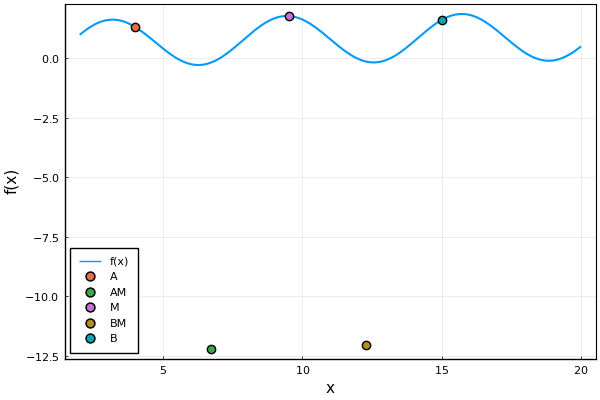

In [30]:
plot(x, f.(x), framestyle = :box, xlabel = "x", ylabel = "f(x)", lw = 1.5, label = "f(x)")
scatter!([a], [f(a)], label = "A", ms = 6)
scatter!([AM[1]], [AM[2]], label = "AM", ms = 6)
scatter!([m], [f(m)], label = "M", ms = 6)
scatter!([MB[1]], [MB[2]], label = "BM", ms = 6)
scatter!([b], [f(b)], label = "B", ms = 6)

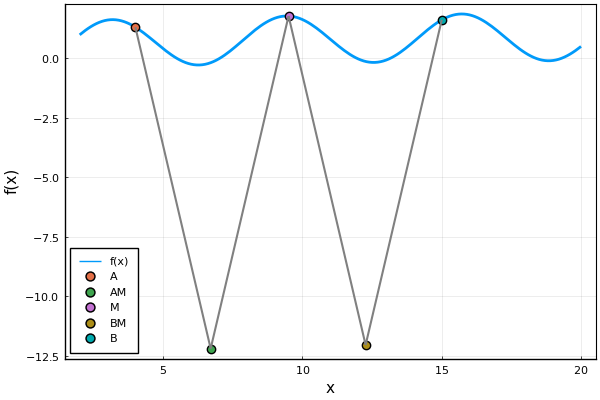

In [31]:
plot(x, f.(x), framestyle = :box, xlabel = "x", ylabel = "f(x)", lw = 2, label = "f(x)")
scatter!([a], [f(a)], label = "A", ms = 6)
scatter!([AM[1]], [AM[2]], label = "AM", ms = 6)
scatter!([m], [f(m)], label = "M", ms = 6)
scatter!([MB[1]], [MB[2]], label = "BM", ms = 6)
scatter!([b], [f(b)], label = "B", ms = 6)
plot!([a,AM[1]], [f(a),AM[2]], ms = 7, lc = :gray, lw = 1.5, label = "")
plot!([AM[1],m], [AM[2],f(m)], ms = 7, lc = :gray, lw = 1.5, label = "")
plot!([m,MB[1]], [f(m),MB[2]], ms = 7, lc = :gray, lw = 1.5, label = "")
plot!([MB[1],b], [MB[2],f(b)], ms = 7, lc = :gray, lw = 1.5, label = "")

In [32]:
x = [A[1] AM[1] M[1] MB[1] B[1]]
Py = [A[2] AM[2] M[2] MB[2] B[2]]
min = argmin(Py)

CartesianIndex(1, 2)

In [33]:
P = [x[min[2]] f(x[min[2]])]

1×2 Array{Float64,2}:
 6.70319  -0.181568

In [34]:
# Stop condition 
Δ = P[2] - y[min[2]]

1.0706859100966672

In [35]:
P_prev = intersec([x[min[2]-1] y[min[2]-1]], P, L)

(5.5010899208328325, -6.192052027914102)

In [36]:
P_next = intersec(P, [x[min[2]+1] y[min[2]+1]], L)

(7.905283420524299, -6.192052027914102)

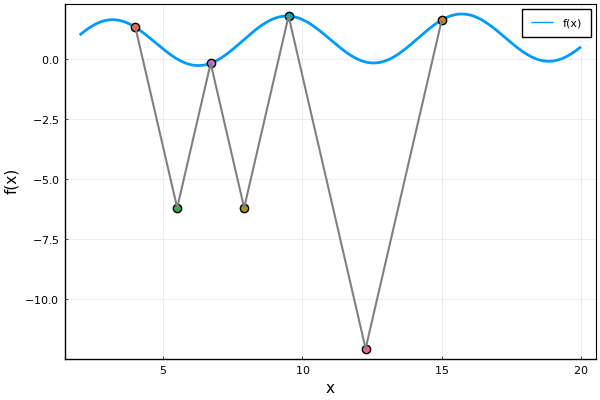

In [37]:
x = 2:0.1:20
plot(x, f.(x), framestyle = :box, xlabel = "x", ylabel = "f(x)", lw = 2, label = "f(x)")
scatter!([a], [f(a)], label = "", ms = 6)
scatter!([P_prev[1]], [P_prev[2]], ms = 6, label = "")
scatter!([P[1]], [P[2]], ms = 6, label = "")
scatter!([P_next[1]], [P_next[2]], ms = 6, label = "")


scatter!([m], [f(m)], ms = 6, label = "")
scatter!([MB[1]], [MB[2]], ms = 6, label = "")
scatter!([b], [f(b)], ms = 6, label = "")

plot!([a,P_prev[1]], [f(a),P_prev[2]], ms = 7, lc = :gray, lw = 1.5, label = "")
plot!([P_prev[1],P[1]], [P_prev[2],P[2]], ms = 7, lc = :gray, lw = 1.5, label = "")
plot!([P[1], P_next[1]], [P[2], P_next[2]], ms = 7, lc = :gray, lw = 1.5, label = "")
plot!([P_next[1], m], [P_next[2], f(m)], ms = 7, lc = :gray, lw = 1.5, label = "")

plot!([m,MB[1]], [f(m),MB[2]], ms = 7, lc = :gray, lw = 1.5, label = "")
plot!([MB[1],b], [MB[2],f(b)], ms = 7, lc = :gray, lw = 1.5, label = "")